# Breast Cancer Diagnosis

#### About this project
This project uses historical datas from the breast cancer images to build a model to predict whether the cell nucleus is malignant or benign. The type of learning is supervised learning and the type of task is binary class classification.


#### Motivation and Goal 
Breast cancer is the most common cancer and the second most deadly cancer in women. Breast cancer prediction can help early detection, improve treatment, and reduce death rate.

 I want to build a model with the highest recall and lowest miss rate. Also, I want to learn what are the most important features in the diagnosis breast cancer. 

#### Data Source

The dataset is from a kaggle project named ' Breast Cancer Wisconsin (Diagnostic) Data Set'. 

#### Citation:

Breast Cancer Wisconsin (Diagnostic) data set. (2016, September 25). Kaggle. 

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data



#### Dataset
The data set is a CSV format. This tabulated data has a data size of 569 rows and 33 columns. 
The data types of the features are 31 float 64, 1 int64, and 1 object. 
The features are generated on the mean, standard error, and worst of the main features such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal_dimension.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,recall_score, precision_score



In [2]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Cleaning

#### Check missing value

In [5]:
null = df.isnull().sum()
null

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df = df.drop(columns=['id', 'Unnamed: 32'])

In [7]:
df.isnull().any().any()

False

#### Check for imbalance

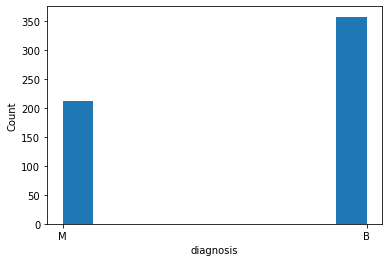

In [8]:
plt.hist(df['diagnosis'])
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

#### Data Munging

In [9]:
df = pd.get_dummies(df, columns=['diagnosis'], drop_first=True)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


#### Results
1: Check the missing value

All of the samples in column Unnamed: 32 are null, and it is too difficult to impute them. I do not need the ID column. So I will delete these two columns.

2: Check for imbalance data using a histogram plot
The dataset has around 210 malignant cases and 350 benign cases.

3: Data Munging

The column diagnosis is an object type, and I convert it to a numerical type for the binary classification. I used the label encoding method. Class M(Malignant) is encoded as 1 and Class B(Benign) is encoded as 0.

#### Conclusions for Data Cleaning
I have dropped columns 'id' and 'Unnamed: 32'. The dataset looks inbalanced from the histogram plots. The diagnosis column is object type and I have encoded it to numerical type. The dataset is small, and the model may suffer overfitting.



## EDA

In [10]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Check for Outliers

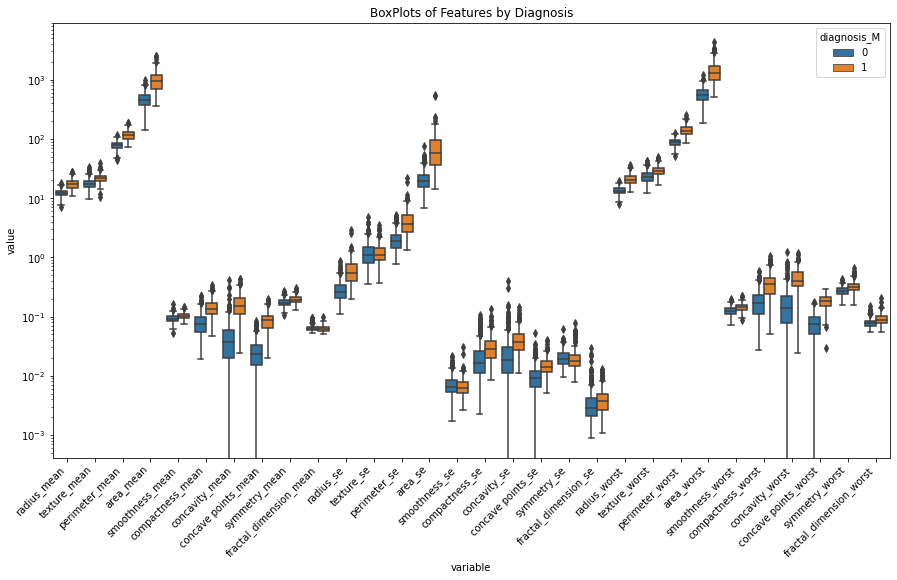

In [11]:
df_melted = pd.melt(df[df.columns], id_vars='diagnosis_M')

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_melted, x='variable', y='value', hue='diagnosis_M')
plt.xticks(rotation=45, ha='right')
plt.yscale('log') 
plt.title('BoxPlots of Features by Diagnosis')

# plt.text(29.5, 7, '1 = Malignant')
# plt.text(29.5, 5, '0 = Benign')


plt.show()

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=0)
print(outliers)

radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean             True
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean               True
fractal_dimension_mean      True
radius_se                   True
texture_se                  True
perimeter_se                True
area_se                     True
smoothness_se               True
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave points_worst       False
symmetry_worst              True
fractal_dimension_worst     True
diagnosis_

#### Transformation for Outliers


In [13]:
outlier_columns = df.columns[outliers]
df[outlier_columns] = np.log1p(df[outlier_columns])


#### Correlation Martix

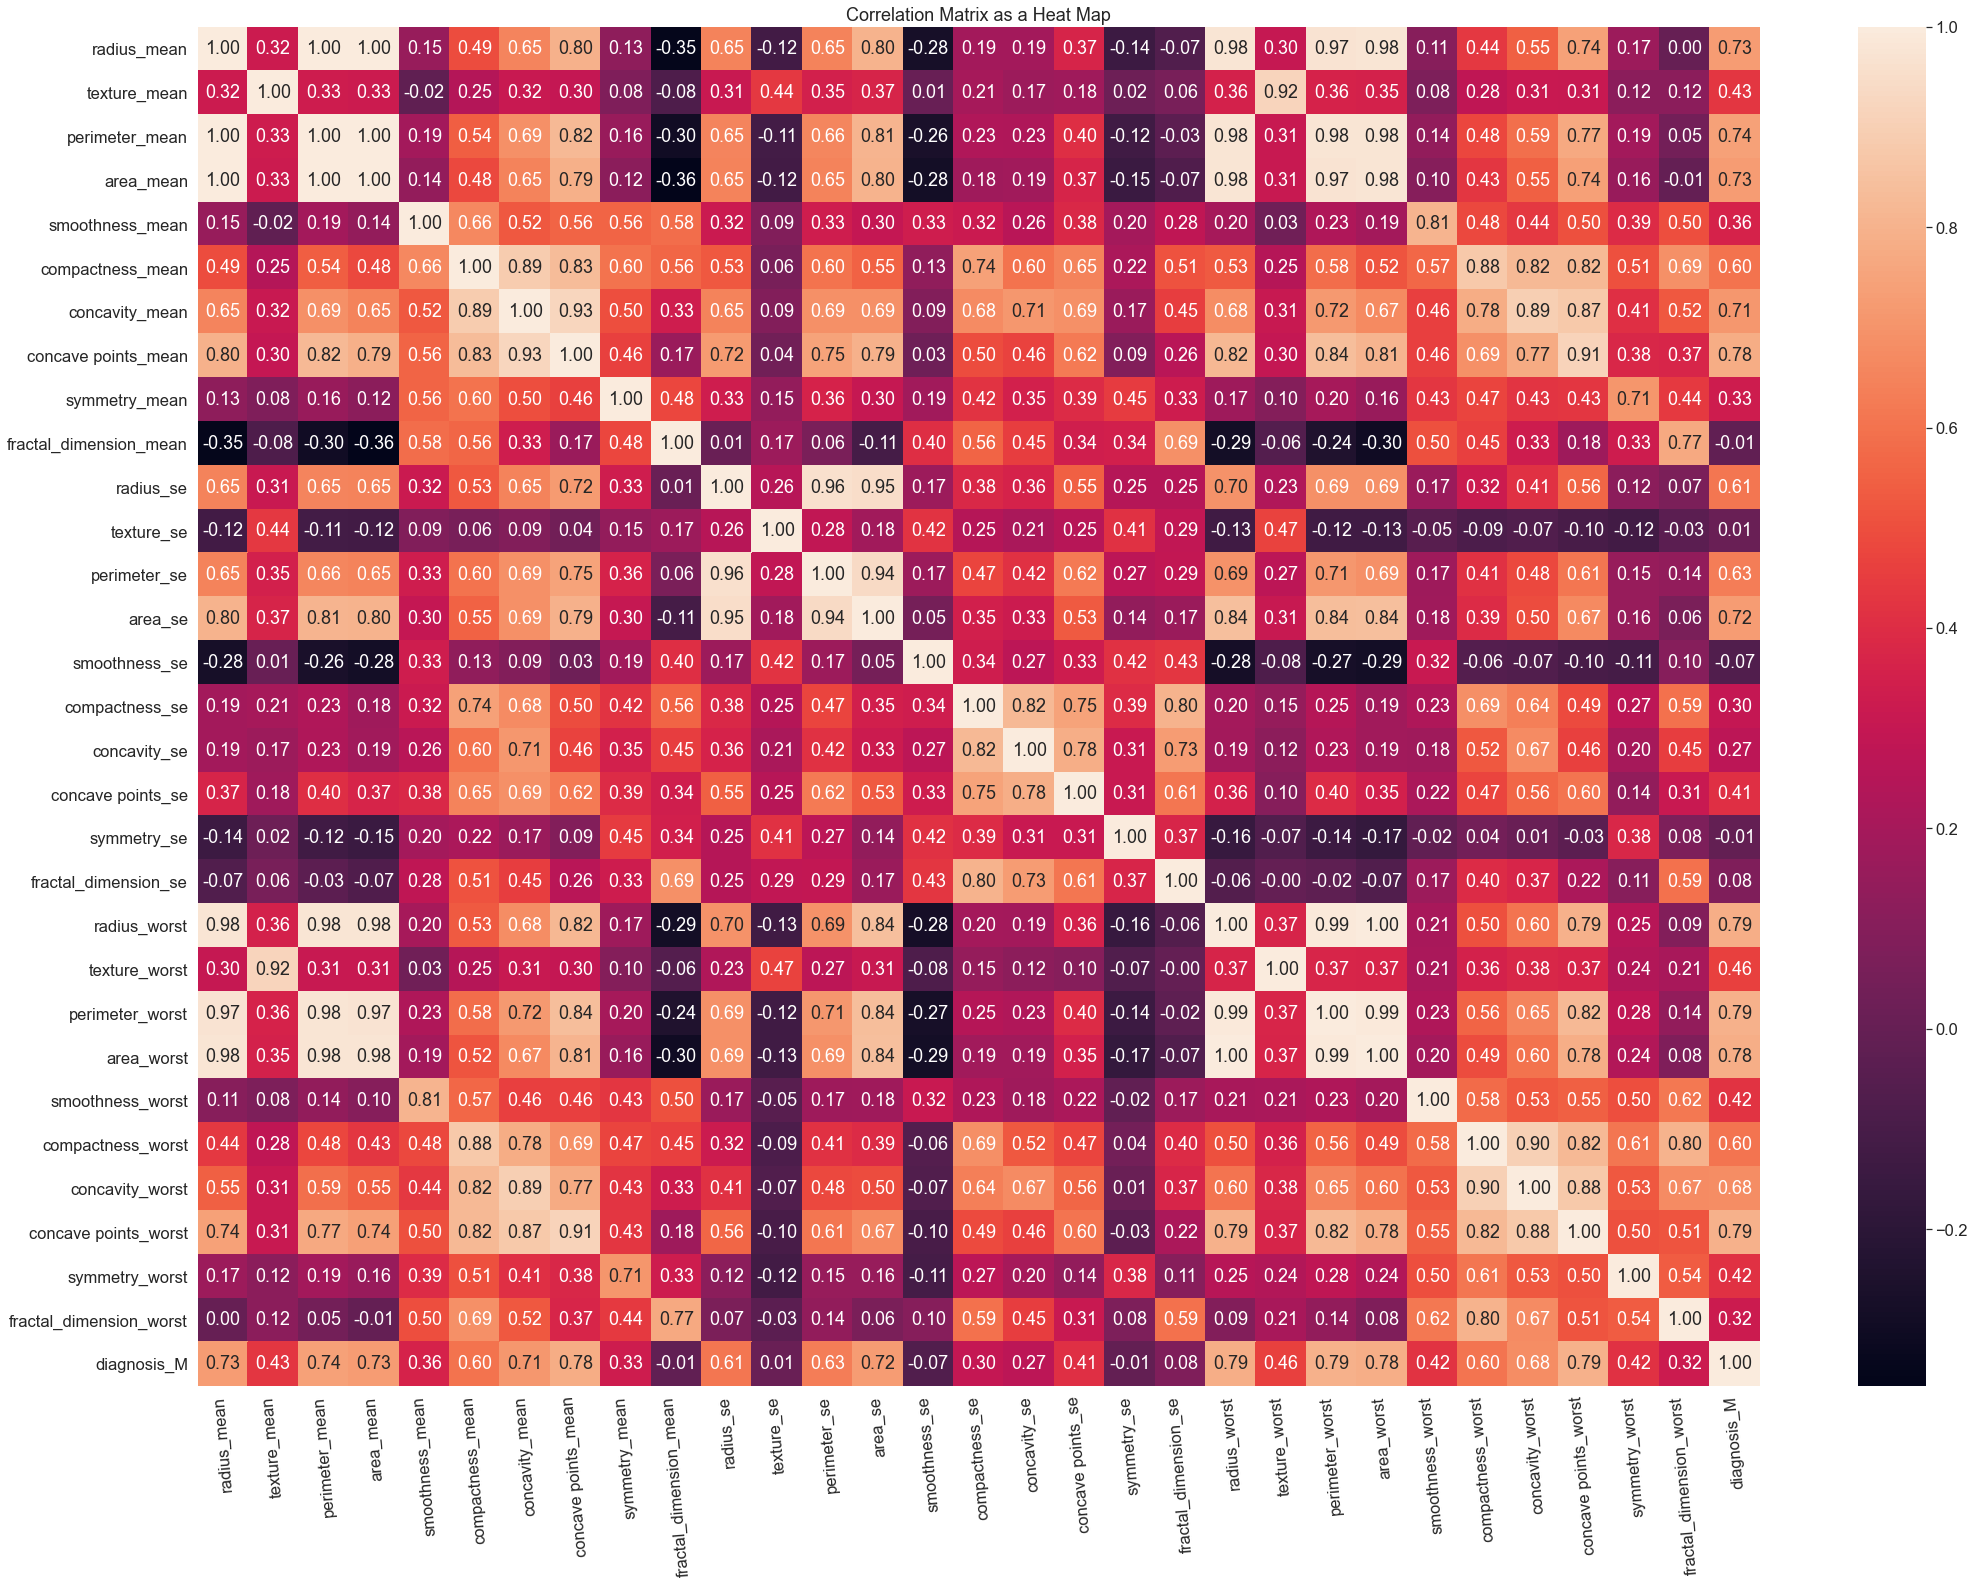

In [14]:
correlation = df.corr()

plt.figure(figsize=(35, 25))
sns.set(font_scale=1.5) 
sns.heatmap(correlation, annot=True,fmt=".2f")
plt.xticks(rotation=95)
plt.title("Correlation Matrix as a Heat Map")
plt.show()

#### Check for Collinearity

In [15]:
collinearity = (correlation > 0.7) & (correlation< 1.0)

collinearity_pairs = []

for col1 in correlation.columns:
    for col2 in correlation.columns:
        if col1 != 'diagnosis_M' and col2 != 'diagnosis_M' and col1 > col2 and collinearity.loc[col1, col2]:
            collinearity_pairs.append((col1, col2))

for pair in collinearity_pairs:
    col1, col2 = pair
    correlation_value = correlation.loc[col1, col2]
    print(f"Columns '{col1}' and '{col2}' have correlation: {correlation_value:.2f}")


Columns 'radius_mean' and 'perimeter_mean' have correlation: 1.00
Columns 'radius_mean' and 'area_mean' have correlation: 1.00
Columns 'radius_mean' and 'concave points_mean' have correlation: 0.80
Columns 'radius_mean' and 'area_se' have correlation: 0.80
Columns 'radius_mean' and 'perimeter_worst' have correlation: 0.97
Columns 'radius_mean' and 'area_worst' have correlation: 0.98
Columns 'radius_mean' and 'concave points_worst' have correlation: 0.74
Columns 'perimeter_mean' and 'area_mean' have correlation: 1.00
Columns 'perimeter_mean' and 'concave points_mean' have correlation: 0.82
Columns 'perimeter_mean' and 'area_se' have correlation: 0.81
Columns 'perimeter_mean' and 'area_worst' have correlation: 0.98
Columns 'perimeter_mean' and 'concave points_worst' have correlation: 0.77
Columns 'concavity_mean' and 'compactness_mean' have correlation: 0.89
Columns 'concavity_mean' and 'concave points_mean' have correlation: 0.93
Columns 'concavity_mean' and 'compactness_worst' have cor

####  Feature Selection Using Correlation Matrix

Text(0.5, 1.0, 'Correlation rank with diagnosis_M')

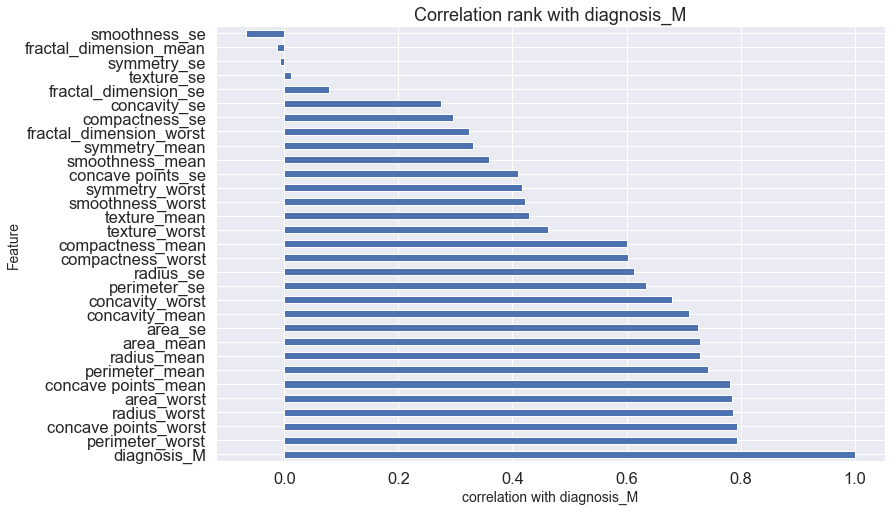

In [16]:
plt.figure(figsize=(12, 8))

correlation['diagnosis_M'].sort_values(ascending=False).plot(kind='barh')
plt.xlabel('correlation with diagnosis_M', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Correlation rank with diagnosis_M')

#### Result and Analysis:

1. summary statistics

    I used a describe function to perform the summary statistics and noticed that the dataset may have outliers.
    

2. check for outliers

    From the Boxplots of features by Diagnosis, I noticed features (such as concavity_mean, concave points_mean, etc.) and diagnosis_M have a strong relationship. I used the quantile function and found out almost every columns has outliers except the concave points_worst column. 
    
   
3. correlation matrix

    From the correlation matrix, we can see that some features in the dataset have high correlation and may suffer collinearity. I print out all the collinearity columns. 



#### Conclusions and Discussions for EDA

The dataset has a lot of outliers and the size is really small, the model may suffer from overfitting. I did a log transformation of the outliers to reduce the impact. The features have a collinearity problem, which means I prefer models like decision tree, random forest, and boosting algorithms. 

## Models

####  Feature Selection Using Random Forest

In [17]:
X = df.drop('diagnosis_M', axis=1)
y = df['diagnosis_M']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
RF = RandomForestClassifier().fit(X_train, y_train)

In [19]:
feature_importance = pd.Series(RF.feature_importances_, index = X.columns).sort_values(ascending=False)


Text(0.5, 1.0, 'Random Forest feature importances')

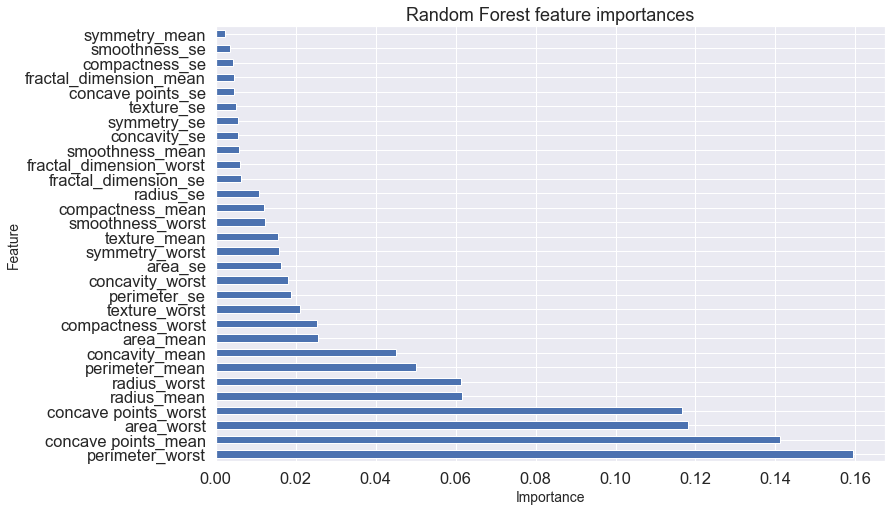

In [20]:
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='barh')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Random Forest feature importances')

In [21]:
selected_features = feature_importance[feature_importance>0.01].index
selected_features


Index(['perimeter_worst', 'concave points_mean', 'area_worst',
       'concave points_worst', 'radius_mean', 'radius_worst', 'perimeter_mean',
       'concavity_mean', 'area_mean', 'compactness_worst', 'texture_worst',
       'perimeter_se', 'concavity_worst', 'area_se', 'symmetry_worst',
       'texture_mean', 'smoothness_worst', 'compactness_mean', 'radius_se'],
      dtype='object')

In [22]:
X_train_selected ,X_test_selected = X_train[selected_features], X_test[selected_features]

#### Build Models with Feature Selection and Cross Validation

In [23]:
algorithm_list = [KNeighborsClassifier(), DecisionTreeClassifier(),
                  RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(), 
                  SVC(kernel='rbf')]


f1_scores = []
recall_scores = []
cross_val_scores = []
FNR_scores = []


for algorithm in algorithm_list:
    
    models = algorithm.fit(X_train_selected,y_train)
    
    scores=cross_val_score(models,X_train_selected,y_train,cv=5)
    cross_val_scores.append(np.mean(scores))

    ypredicts = models.predict(X_test_selected)
    
    recall = recall_score(y_test, ypredicts)
    recall_scores.append(recall)
    
    
    f1 = f1_score(y_test, ypredicts)
    f1_scores.append(f1)
    
    
    FNR = 1- recall_score(y_test, ypredicts)
    FNR_scores.append(FNR)

        
    print(algorithm, )
    print('F1 score: {:.3f}'.format(f1))
    print('Recall score: {:.3f}'.format(recall))
    print('Miss rate score: {:.3f}'.format(FNR))
    print("Cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
    print(' ')
    
    



KNeighborsClassifier()
F1 score: 0.976
Recall score: 0.953
Miss rate score: 0.047
Cross-val mean-accuracy: 0.938
 
DecisionTreeClassifier()
F1 score: 0.884
Recall score: 0.884
Miss rate score: 0.116
Cross-val mean-accuracy: 0.936
 
RandomForestClassifier()
F1 score: 0.952
Recall score: 0.930
Miss rate score: 0.070
Cross-val mean-accuracy: 0.952
 
AdaBoostClassifier()
F1 score: 0.977
Recall score: 0.977
Miss rate score: 0.023
Cross-val mean-accuracy: 0.958
 
GradientBoostingClassifier()
F1 score: 0.952
Recall score: 0.930
Miss rate score: 0.070
Cross-val mean-accuracy: 0.954
 
SVC()
F1 score: 0.938
Recall score: 0.884
Miss rate score: 0.116
Cross-val mean-accuracy: 0.899
 


#### Evaluation Metrics


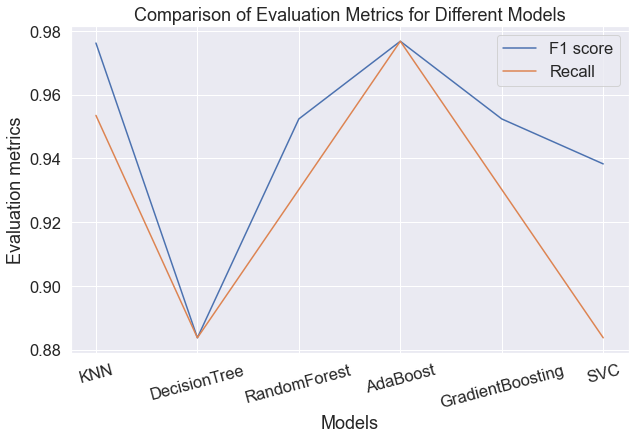

In [24]:

model = ['KNN', 'DecisionTree','RandomForest','AdaBoost','GradientBoosting', 'SVC']

plt.figure(figsize=(10, 6))
plt.plot(model, f1_scores, label ='F1 score')
plt.plot(model, recall_scores, label = 'Recall')
# plt.plot(model, cross_val_scores, label ='cross val mean accuracy')

plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xlabel('Models')
plt.xticks(rotation=15)

plt.ylabel('Evaluation metrics')
plt.legend()
plt.show()

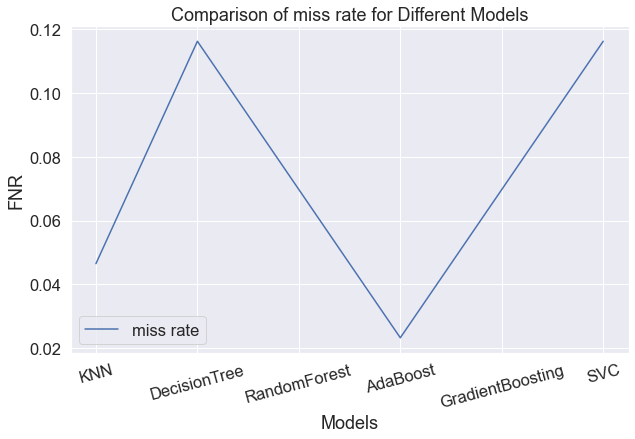

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(model,FNR_scores, label = 'miss rate')

plt.title('Comparison of miss rate for Different Models')
plt.xlabel('Models')
plt.xticks(rotation=15)

plt.ylabel('FNR')
plt.legend()
plt.show()


#### Hyperparameter Tuning for AdaBoost


In [26]:
parameters_ada = {'n_estimators':[10, 50, 100, 300,500], 'learning_rate':[0.01,0.1,0.5,1]}
ada_model = AdaBoostClassifier()
grid_ada = GridSearchCV(ada_model, parameters_ada, cv=5)
grid_ada.fit(X_train_selected, y_train)
print("Best parameters", grid_ada.best_params_)
print("Best score", grid_ada.best_score_)
print("Best estimator", grid_ada.best_estimator_)

Best parameters {'learning_rate': 0.1, 'n_estimators': 500}
Best score 0.9758241758241759
Best estimator AdaBoostClassifier(learning_rate=0.1, n_estimators=500)


In [27]:
yp_ada = grid_ada.best_estimator_.predict(X_test_selected)
print('AdaBoost metrics score after Hyperparameter tuning:')
print('Recall score : {:.3f}'.format(recall_score(y_test, yp_ada)))
print('F1 score: {:.3f}'.format(f1_score(y_test, yp_ada)))
print('Miss Rate: {:.3f}'.format(1-recall_score(y_test, yp_ada)))


AdaBoost metrics score after Hyperparameter tuning:
Recall score : 0.953
F1 score: 0.976
Miss Rate: 0.047


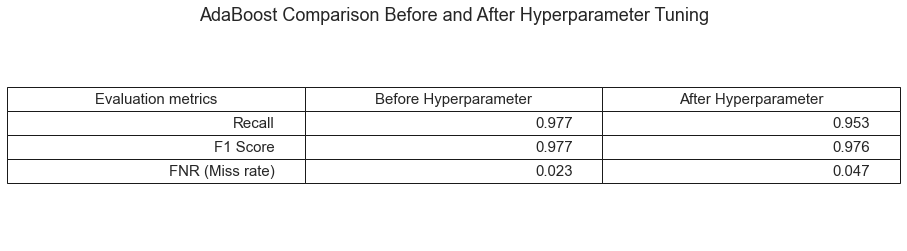

In [32]:
name = ['Recall', 'F1 Score', 'FNR (Miss rate)']
before_hyper = [0.977, 0.977, 0.023]
after_hyper = [0.953, 0.976,0.047]

fig, ax = plt.subplots(figsize=(8, 4))
table_data = [[name[i], before_hyper[i], after_hyper[i]] for i in range(len(name))]
table = ax.table(cellText=table_data, colLabels=['Evaluation metrics','Before Hyperparameter', 'After Hyperparameter'], loc='center')

table.set_fontsize(15)
table.scale(2, 2)

ax.axis('off')

plt.title('AdaBoost Comparison Before and After Hyperparameter Tuning')
plt.show()

#### Results and Analysis

1. Feature selection: 

I plot the feature correlation rank with diagnosis and plot the build-in function feature_importance's result from the random forest. I used the selected features to build models. 

2. Build Models with Feature Selection and Cross Validation

From the EDA steps, we know the features have a collinearity problem. Because we have a small amount of data and we could not afford to delete more data. I have only chosen model that is robust to collinearity such as KNN, DecisionTree, RandomForest, AdaBoost, GradientBoosting, and SVC. The dataset is limited and will suffer from overfitting. I use cross-validation to reduce the overfitting impact. 


3. Evaluation metrics

For prediction breast cancer diagnosis. It is important to look at recall (total positive rate) and miss rate(false negative rate). Missing malignant case will have a high cost.  I also choose the F1 score for evaluation metrics.  F1 score is a robust metric because it has both recall and precision.  
 


4. Hyperparameter tuning and XGBoost

From the results of hyperparameter tuning, we can see that AdaBoost's F1 score didnot change. The miss rate becomes higher and recall become lower. This shows that the model suffers from overfitting. 



#### Conclusions and Discussions for Models

From the plots Comparison of Evaluation Metrics and Miss Rate for Different Models. I can see AdaBoost model has highest F1 score (0.977). The result is similar to KNN model. But AdaBoost has higher recall rate (0.977) and lowest miss rate(0.023) when compare with KNN. I choose AdaBoost as the final model to use. I tried hyperparameter tuning on the AdaBoost model try to improve the result. but the result is not better than before.  This shows signs of overfitting because of the limited dataset. I will try the advanced model XGBoost.


### XGBoost



In [29]:
import sys
!{sys.executable} -m pip install xgboost

In [30]:
from xgboost import XGBClassifier


XG =XGBClassifier()
XG.fit(X_train_selected,y_train)
yp_XG = XG.predict(X_test_selected)

scores=cross_val_score(XG,X_train_selected,y_train,cv=5)

recall = recall_score(y_test, ypredicts)


FNR = 1 - recall_score(y_test, ypredicts)
    
print('F1 score: {:.3f}'.format(f1_score(y_test, ypredicts)))
print('Recall score: {:.3f}'.format(recall))
print('Miss rate: {:.3f}'. format(FNR))
print("Cross-val mean-accuracy: {:.3f}".format(np.mean(scores)))
    



F1 score: 0.938
Recall score: 0.884
Miss rate: 0.116
Cross-val mean-accuracy: 0.969


#### Result and Analysis

To address the issue of overfitting further, I used an advanced model XGBoost. Because it will implement regularization and random sampling of the data and features. But the result did not improve.

## Discussion and Conclusion for this project

From the result comparisons, AdaBoost is the best model for this project. Even though AdaBoost (0.977) model has the similar F1 score compare with KNN model (0.976). But Adaboost model has highest recall rate (0.977) and lowest miss rate (0.023) which is important in Breast Cancer diagnosis. Because missing a cancer case will put someone's life in danger.

From this project, I have learned that perimeter_worst, concave points_mean, area_worst, concave points_worst and radius_meanare the top five important features for diagnosing breast cancer. The higher those values, the higher the chance of being diagnosed as malignant.

From the EDA and Models step, I have learned Feature selection improved the result of the decision tree and boosting algorithm. Outliers have a big impact on the KNN model not so much for decision tree and boosting algorithms.

The model suffers from an overfitting issue because of the limited dataset. I use feature engineering, cross-validation, hyperparameter tuning, and an XGBoost model that implements regularization and random sampling of data and features. Those methods did not improve the model performance. I have learned that When you have a limited data sample, the advanced models or techniques won't be able to solve the problem. To solve this problem, we need to collect more data samples.